In [2]:
import numpy as np
import pickle


f = open(f"/Users/akotamraju/Documents/dev/URAP/main-responseapprox/data/128-denoised/FlatContinuumIsotropic.inc970.id1.tra.gz.pkl", "rb");
    
vals = pickle.load(f)

y_arr = np.array(vals['y'])
print(y_arr.shape)

f.close()

(36, 196608)


In [3]:
arr  = y_arr[10]

In [4]:
import numpy as np
import healpy as hp
from scipy.interpolate import griddata

# Assuming you have a 1D array of Healpix data and the NSIDE value (e.g., nside = 128)
# Replace 'healpix_data' with your actual data array
healpix_data = arr  # Your 1D array of Healpix data
nside = 128

# Step 1: Healpix to Cartesian
vecs = hp.pix2vec(nside, np.arange(hp.nside2npix(nside)))

# Step 2: Convert to Cartesian Coordinates
x, y, z = vecs

# Step 3: Convert to Rectangular Coordinates (in degrees)
longitude = np.degrees(np.arctan2(y, x))
latitude = np.degrees(np.arcsin(z))

# Step 4: Create a regular grid for the rectangular representation
grid_longitude = np.linspace(-180.0, 180.0, 512)
grid_latitude = np.linspace(-90.0, 90.0, 384)
grid_longitude, grid_latitude = np.meshgrid(grid_longitude, grid_latitude)

# Step 5: Interpolate the Healpix data onto the regular grid using bilinear interpolation
# (assuming 'healpix_data' contains the values associated with each Healpix pixel)
interpolated_data = griddata((longitude, latitude), healpix_data, (grid_longitude, grid_latitude), method='linear')


In [5]:
interpolated_data.shape

(384, 512)

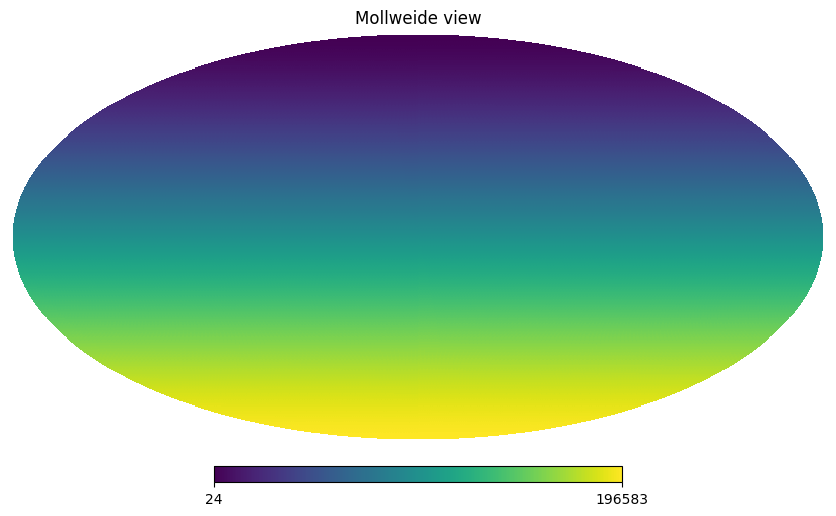

In [6]:
hp.mollview(np.array(list(range(196608))))

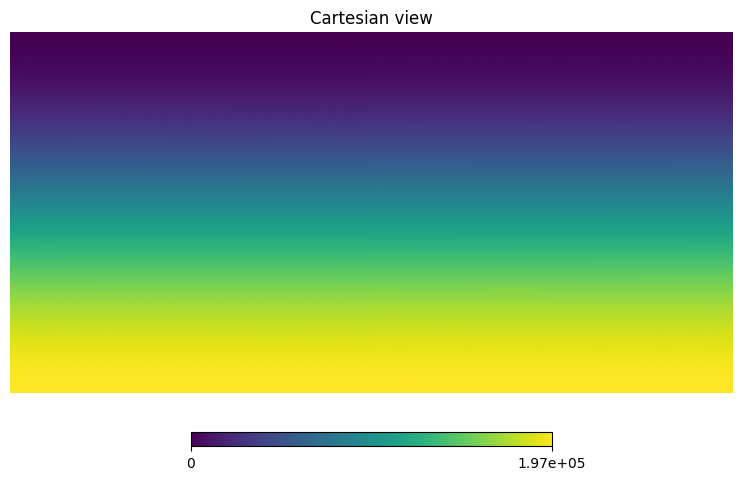

In [7]:
cart_output = hp.cartview(np.array(list(range(196608))), xsize=512, ysize=384, return_projected_map=True)

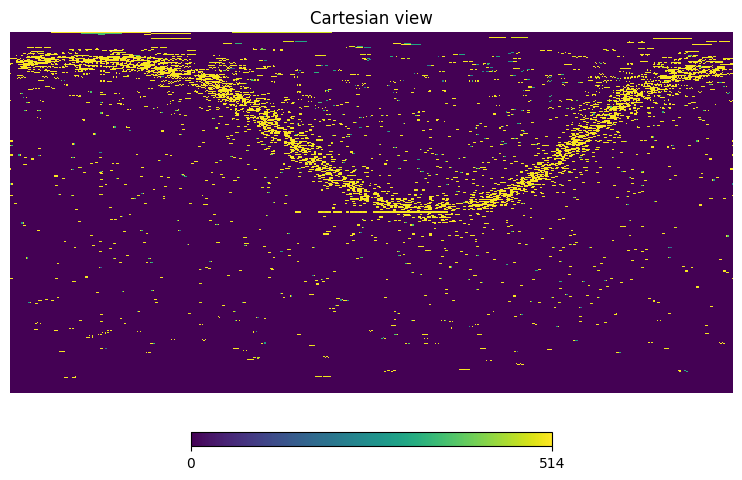

In [8]:
cart_output = hp.cartview(arr, xsize=512, ysize=384, return_projected_map=True)

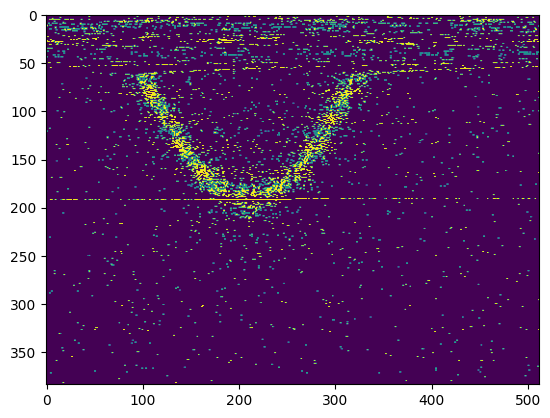

In [11]:
import matplotlib.pyplot as plt

plt.imshow(y_arr[10].reshape(384, 512))

In [25]:

# Note: The 'interpolated_data' now contains the rectangular representation with dimensions 512 by 384.

# Step 6: (Optional) Conversion back to Healpix
# If you need to convert the rectangular representation back to Healpix later, you can use:
x, y, z = hp.ang2vec(np.radians(grid_longitude), np.radians(grid_latitude))
pix_indices = hp.vec2pix(nside, x, y, z)
# 'pix_indices' will contain the Healpix pixel indices corresponding to the rectangular representation.

print(pix_indices)

ValueError: too many values to unpack (expected 3)

In [95]:
import healpy as hp
import numpy as np

def healpix_to_rectangular(healpix_array, nside, width, height):
    """
    Convert a HEALPix array to a rectangular shape.
    
    Parameters:
        healpix_array (numpy array): The 1D HEALPix array.
        nside (int): The NSIDE parameter of the HEALPix array.
        width (int): The width of the rectangular shape.
        height (int): The height of the rectangular shape.
    
    Returns:
        numpy array: The rectangular representation of the HEALPix array.
    """
    npix = hp.nside2npix(nside)
    if len(healpix_array) != npix:
        raise ValueError("Invalid size of the input HEALPix array")

    # Create an empty rectangular array
    rectangular_array = np.zeros((height, width), dtype=healpix_array.dtype)

    # Convert HEALPix to pixel indices in the rectangular shape
    theta, phi = hp.pix2ang(nside, np.arange(npix))
    x = ((phi / (2 * np.pi)) * width).astype(int)
    y = (((np.pi / 2 - theta) / np.pi) * height).astype(int)
    indices = y * width + x

    # Map HEALPix values to the rectangular array
    rectangular_array.flat[indices] = healpix_array

    return rectangular_array

# Example usage:
nside = 128
width = 512
height = 384
healpix_array = np.random.rand(hp.nside2npix(nside))
rectangular_array = healpix_to_rectangular(healpix_array, nside, width, height)


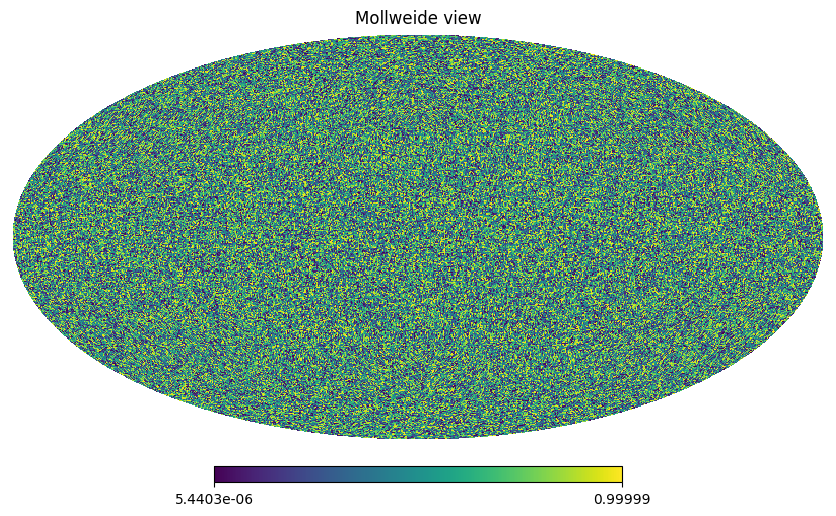

In [110]:
hp.mollview(healpix_array)

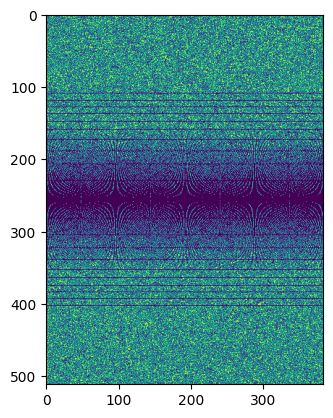

In [111]:
plt.imshow(rectangular_array)